In [1]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from mdp import *
from utils import *

%matplotlib inline


In [2]:
gridmdp = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [3]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '.'], ['^', None, '^', '.'], ['^', '>', '^', '<']]

In [4]:
from utils import print_table
print_table(gridmdp.to_arrows(pi))


>   >      >   .
^   None   ^   .
^   >      ^   <


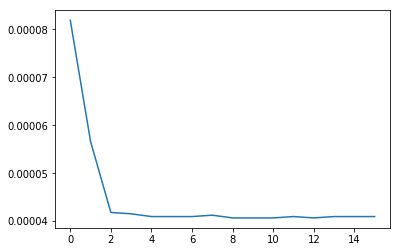

In [5]:
U_vi, vi_iter_time = value_iteration(gridmdp)
plt.plot(vi_iter_time)

[[ 0.29628832  0.253867    0.34475423  0.12987275]
 [ 0.39844322         nan  0.48644002 -1.        ]
 [ 0.50939438  0.64958568  0.79536209  1.        ]]


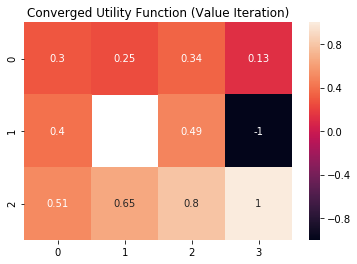

In [6]:




vi_utility_dict, iter_time = value_iteration(gridmdp)
#vi_utility_array = np.ndarray((3,4))

#for key,value in vi_utility_dict.items():
#    vi_utility_array[key[1],key[0]] = value


def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return utility_array

vi_utility_array = utility_dict_toarray(vi_utility_dict, (3,4))


print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")


>   >      >   .
^   None   ^   .
>   >      ^   <


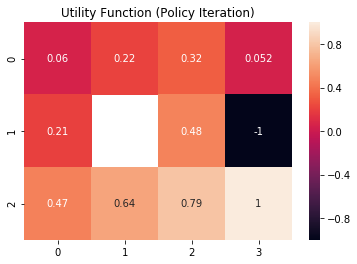

In [7]:
pi, U, pi_iter_time = policy_iteration(gridmdp)
pi_utility_array = utility_dict_toarray(U, (3,4))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp.to_arrows(pi))



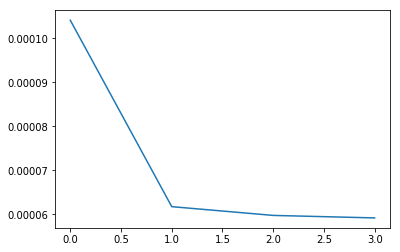

In [8]:
plt.plot(pi_iter_time)

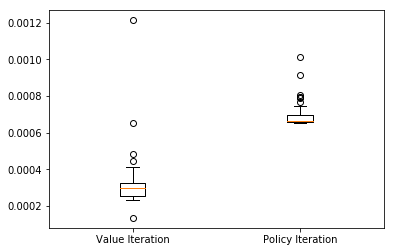

In [9]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

In [10]:
gridmdp = GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])

In [11]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '>', '>', '>', '>', 'v'],
 ['v', None, '>', '>', '>', '>', '>', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '.'],
 ['>', '>', '>', '>', '>', '^', '^', '.']]

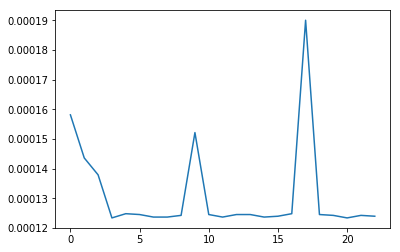

In [12]:
U_vi, vi_iter_time = value_iteration(gridmdp)
plt.plot(vi_iter_time)

In [13]:
vi_utility_dict, iter_time = value_iteration(gridmdp)

[[ 0.07811426  0.14250221  0.21406138  0.29407239  0.38267129  0.47989722
   0.47672057 -1.        ]
 [ 0.09458304  0.17293099  0.25632262  0.35649541  0.47451101  0.61465605
   0.78268053  1.        ]
 [ 0.03416822         nan  0.22648568  0.31536193  0.41687432  0.53261682
   0.66417455  0.81294033]
 [ 0.0470635   0.11081334  0.18177099  0.25698742  0.3409406   0.43435796
   0.53795894  0.65245418]]


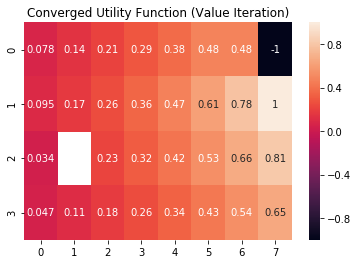

In [14]:
vi_utility_array = utility_dict_toarray(vi_utility_dict, (4,8))


print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

>   >      >   >   >   >   >   v
v   None   >   >   >   >   >   v
>   >      >   >   >   >   >   .
>   >      >   >   >   ^   ^   .


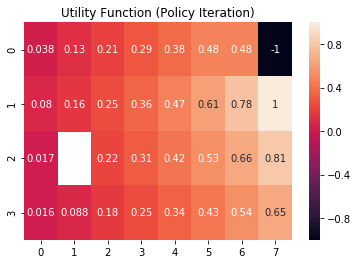

In [15]:
pi, U, pi_iter_time = policy_iteration(gridmdp)
pi_utility_array = utility_dict_toarray(U, (4,8))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp.to_arrows(pi))

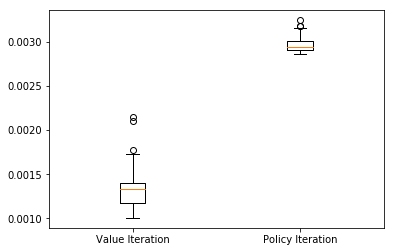

In [16]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

In [17]:
#Use np.ndarray.tolist to get list out of the ndarray
#Create gridworlds as ndarrays first 

In [58]:
import random

list_grid = [[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]]

#R = np.ndarray(list_grid)

states = vi_utility_array.size

#4 actions for our grid world
Q = np.zeros((states,4))

gamma = 0.9

next_action = (1, 0)

#We want Qs, so for all actions, we will see what state we will end up in? 

state_dict = {key:value for (key,value) in zip(list(gridmdp.states), range(len(gridmdp.states)))}


directions = {(1, 0): 0, (0, 1): 1, (-1, 0): 2, (0, -1): 3, None: 4}

print(gridmdp.states)

for x in range(1000):
    current = random.sample(gridmdp.states, 1)[0]
    while True:
        next_action = random.choice(gridmdp.actions(current))
        if next_action == None:
            break
        next_state = gridmdp.go(current, next_action)
        Q[state_dict.get(current), directions.get(next_action)] = 1.0 * gridmdp.R(next_state) + gamma*(Q[next_state,:].max())
        current = next_state


print(Q)

print(Q[20,1])

#To get the states
print(gridmdp.states)
#To get the actions available in every state
print(random.choice(gridmdp.actions((7,0))))
print(gridmdp.actions((0,0)))

{(7, 3), (1, 3), (3, 0), (2, 1), (6, 2), (5, 1), (0, 3), (7, 2), (4, 0), (3, 3), (6, 3), (5, 0), (2, 2), (4, 1), (1, 1), (3, 2), (0, 0), (7, 1), (6, 0), (2, 3), (4, 2), (1, 0), (5, 3), (0, 1), (7, 0), (6, 1), (3, 1), (2, 0), (4, 3), (5, 2), (0, 2)}
[[ 8.96    8.96    7.1816  8.96  ]
 [ 7.1816  7.1816  8.024   7.1816]
 [ 8.024   7.1816  8.024   8.024 ]
 [ 7.1816  7.1816  7.1816  8.024 ]
 [ 8.96    7.1816  7.1816  7.1816]
 [ 7.1816  7.1816  8.024   8.024 ]
 [ 7.1816  8.024   8.024   8.024 ]
 [ 8.96    8.96    7.1816 10.    ]
 [ 8.024   8.024   8.024   8.024 ]
 [ 8.024   7.1816  7.1816  7.1816]
 [ 8.96    7.1816  7.1816  7.1816]
 [ 8.024   7.1816  8.024   8.024 ]
 [ 7.1816  7.1816  7.1816  7.1816]
 [ 7.1816  8.024   7.1816  8.024 ]
 [ 7.1816  7.1816  8.024   8.024 ]
 [ 8.024   7.1816  7.1816  7.1816]
 [ 8.024   8.024   8.024   8.024 ]
 [ 0.      0.      0.      0.    ]
 [ 8.      7.1816  8.024   8.024 ]
 [ 7.1816  7.1816  7.1816  7.1816]
 [ 7.1816  8.024   7.1816  8.024 ]
 [ 8.024   7.181